<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 
 - Jose Antonio Castaño Gutierrez  
 - Luis Felipe Gomez Estrada  
**Fecha:** 10 de febrero del 2021.

**Expediente** : IF711469.  
**Expediente** : 722749.  
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 2: Clase 4


1. Imagine una rutina contable utilizada en una librería. Funciona en una lista con sublistas, que se ven así:
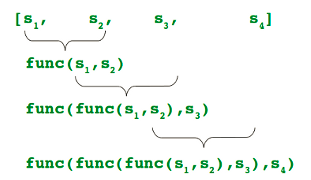
Escriba un programa en Python, que devuelve una lista con tuplas de tamaño 2. Cada tupla consiste en el número de pedido y el costo total del pedido. El producto debe aumentarse en 10€ si el valor de la orden es inferior a 100,00 €. 
Escribe un programa Python usando unicamente las funciones **lambda y map**.

`orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]`
           
2. La misma librería, pero esta vez trabajamos en una lista diferente. Las sublistas de nuestras listas se ven así: 
[número de orden, (número de artículo, cantidad, precio por unidad), ... (número de artículo, cantidad, precio por unidad)] 

`orders = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
	       [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
	       [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
           [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]`

Escriba un programa que devuelva una lista de dos tuplas que tengan la información de (número de pedido, cantidad total de pedido). Utilice la función `Reduce`. Recuerde el precio del pedido del producto debe aumentarse en 10€ si el valor de la orden es inferior a 100,00 €.

3. Resolver los anteriores ejercicios usando pandas (DataFrame)  
  

4. Use filter to eliminate all words that are shorter than 4 letters from a list of words
`list='the notion of a lambda function goes all the way back to the origin of computer science'`  
  
  
5. Use filter to determine the percentage of Fahrenheit temperatures in a list are within the range 32 to 80  
  
  
6. Use reduce to find the lower left corner (minimum x and minimum y value) for a list of point locations
> **Hint**: Explore the command `np.minimum.reduce` [link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ufunc.reduce.html)

7. Vectorizar la distribución de Poisson
$$p(k)=\frac{\lambda^k e^{-\lambda}}{k!},\quad k\in \mathbb{N}$$

## Luis Felipe Gómez Estrada

In [151]:
import pandas as pd
import numpy as np
from functools import reduce
import scipy.special as sps 
import matplotlib.pyplot as plt

In [97]:
########### Solución 1
orders1 = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]

list(map(lambda x: (x[0], (x[2] * x[3]) if x[2]*x[3] >= 100 else x[2]*x[3]+10), orders1))

[('34587', 163.8),
 ('98762', 284.0),
 ('77226', 108.85000000000001),
 ('88112', 84.97)]

In [96]:
########### Solución 2
orders2 = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
          [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
          [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
          [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]
list(map(lambda x: (x[0], reduce(lambda a, b: a+b, list(map(lambda c: c[1]*c[2] if c[1]*c[2] >= 100 else c[1]*c[2] + 10, x[1:])))), orders2))

[(1, 688.3299999999999),
 (2, 504.46000000000004),
 (3, 374.79999999999995),
 (4, 502.57)]

In [121]:
########### Solución 3 - 1
s1 = pd.DataFrame(orders1)
res1 = pd.DataFrame({'# Pedido': s1.iloc[:,0], 
                   'Total': (s1.iloc[:,2] * s1.iloc[:,3])\
                            .apply(lambda x: x + 10 if x < 100 else x)})
res1

,# Pedido,Total
0,34587,163.80
1,98762,284.00
2,77226,108.85
3,88112,84.97


In [208]:
########### Solución 3 - 2
s2 = pd.DataFrame(orders2)

def reduce_total(li: pd.Series) -> float:
    """ Calculates the total of the orders.
    
    Parameters
    ----------
    li : pandas.Series
        containing the orders
    Returns
    -------
    float : total of the order
    """
    return reduce(lambda a, b: a + b, \
                  map(lambda c: c[1]*c[2] if c[1]*c[2] >= 100 else c[1]*c[2]+10, \
                      filter(lambda x: x != None, li)))
pd.DataFrame({'#': s2.iloc[:,0],
              'Total': s2.iloc[:,1:].apply(reduce_total, axis=1)})

,#,Total
0,1,688.33
1,2,504.46
2,3,374.80
3,4,502.57


In [134]:
########### Solución 4
l1 = 'the notion of a lambda function goes all the way back to the origin of computer science'
list(filter(lambda w: len(w) >= 4, l1.split()))

['notion',
 'lambda',
 'function',
 'goes',
 'back',
 'origin',
 'computer',
 'science']

In [143]:
########### Solución 5
import numpy as np
np.random.seed(55555)
temperatures = np.random.uniform(25,110,30)
print(len(temperatures[(32 <= temperatures) & (temperatures <= 80)])/len(temperatures))

0.4666666666666667


In [150]:
########### Solución 6
np.random.seed(55555)
point_xy = np.random.randint(0,100,[30,2])
print(np.minimum.reduce(point_xy))

[0 2]


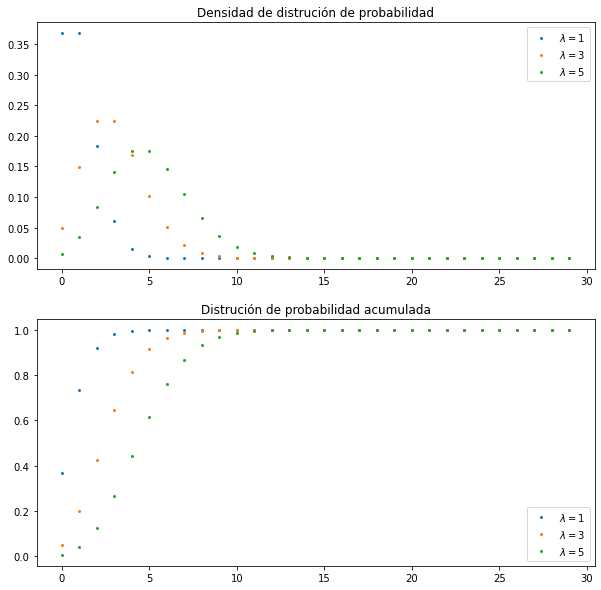

In [204]:
########### Solución 7
p = lambda k,l:(l**k*np.exp(-l))/sps.factorial(k)
N = 30
l = np.array([1, 3, 5])
k = np.arange(N)

vals = np.array([p(k,la) for la in l])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10));

ax1.title.set_text('Densidad de distrución de probabilidad')
ax2.title.set_text('Distrución de probabilidad acumulada')
ax1.plot(vals.T, 'o', markersize=2)
ax2.plot(vals.T.cumsum(axis=0), 'o', markersize=2)
ax1.legend([f'$\lambda={i}$' for i in l])
ax2.legend([f'$\lambda={i}$' for i in l])
plt.show()

# Jose Antonio Castaño Gutiérrez

In [29]:
########### Solución 1
orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]

p_aumento = list(map(lambda x: [x[0], x[2]*x[3] if (x[2]*x[3] > 100) else x[2]*x[3] + 10], orders))
p_aumento

[['34587', 163.8],
 ['98762', 284.0],
 ['77226', 108.85000000000001],
 ['88112', 84.97]]

In [30]:
########### Solución 2
orders = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
          [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
          [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
          [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]

from functools import reduce
sol = list(map(lambda x: (x[0], reduce(lambda x , y : x + y, list(map(lambda y: y[1]*y[2] if y[1]*y[2] > 100 else y[1]*y[2] + 10, x[1:])))), orders))
sol

[(1, 688.3299999999999),
 (2, 504.46000000000004),
 (3, 374.79999999999995),
 (4, 502.57)]

In [42]:
########### Solución 3.1
import pandas as pd
p_aumento = pd.DataFrame(p_aumento)
p_aumento.columns = ['Número de pedido', 'Costo total del pedido']
p_aumento

,Número de pedido,Costo total del pedido
0,34587,163.80
1,98762,284.00
2,77226,108.85
3,88112,84.97


In [44]:
########### Solución 3.2
producto=lambda x: x[1] * x[2] if (x[1]*x[2] > 100) else x[1] * x[2] +10
suma_p = lambda x, y: x + y

sol= list(map(lambda x:[x[0],reduce(suma_p,(list(map(producto,x[1:]))))],orders))
sol

sol_pandas = pd.DataFrame(sol)
sol_pandas.columns = ['Número de pedido', 'Costo total del pedido']
sol_pandas

,Número de pedido,Costo total del pedido
0,1,688.33
1,2,504.46
2,3,374.80
3,4,502.57


In [33]:
########### Solución 4
l1 = 'the notion of a lambda function goes all the way back to the origin of computer science'
reduccion = list(filter(lambda x: len(x)>=4, l1.split()))
reduccion

['notion',
 'lambda',
 'function',
 'goes',
 'back',
 'origin',
 'computer',
 'science']

In [36]:
########### Solución 5
import numpy as np
np.random.seed(55555)
temperatures = np.random.uniform(25,110,30)

temp = len(list(filter(lambda x: 32 <= x <= 80, temperatures))) / len(temperatures)
temp

0.4666666666666667

In [46]:
########### Solución 6
np.random.seed(55555)
point_xy = np.random.randint(0,100,[30,2])

np.minimum.reduce(point_xy)

array([0, 2])

### Ejercicio 7: Vectorizar distribución de poisson
$$\textbf{Función de densidad de probabilidad}\\p(k)=\frac{\lambda^k e^{-\lambda}}{k!},\quad k\in \mathbb{N}$$

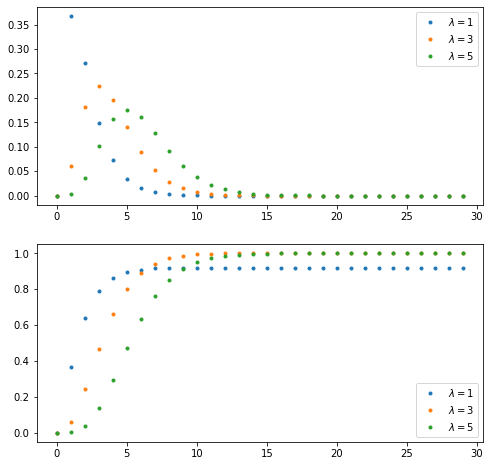

In [76]:
########### Solución 7
import matplotlib.pyplot as plt
import scipy.special as sps 

N = 30
l = [1, 3, 5]
k = np.arange(N)

p = lambda k,l: (l**k * np.exp(-l)) / sps.factorial(k)

# Graficar para todo l una gráfica de p(k) usando subplots (como matrices)
fig, ax = plt.subplots(2,1, figsize=(8,8))

lista = np.array([p(lambd, k) for lambd in l])

ax[0].plot(k, P.T, '.')
ax[1].plot(k, np.cumsum(lista.T, axis=0), '.')

# contruir el legend en latex para cada l
ax[0].legend(['$\lambda={1}$','$\lambda={3}$','$\lambda={5}$'])
ax[1].legend(['$\lambda={1}$','$\lambda={3}$','$\lambda={5}$'])
plt.show()

Enlace repositorio: https://github.com/if722749/ProyectoConjunto_JACasta-o_LFGomez